#  Predictive Analysis: World Wide Alcohol Consumption

The goal of this program is to import, clean, analyze and predict the average alcohol consumption of the worlds population based on sex and type of beverage. 

## The parameters used for this analysis are:
##### Country:
- Average percent of the countrys males and females that consumes alcohol
- Average percent of the population that consumes alcohol by wine, beer and spirits

#### The first step of this process is to import the data and the librarys used for this process
This data is coming from the world health organization's 'Global Health Observatory data repository'
- Consumption by type of alcoholic beverages by country: https://apps.who.int/gho/data/node.main.A1023?lang=en
- Average daily intake in grams of alcohol by country: https://apps.who.int/gho/data/node.main.A1037?lang=en

Import all libraries used for this project

In [2]:
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual, widgets
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

Then import the 'comma seperated value' files into the notebook

In [3]:
path1= "data_amount.csv"
path2= "data_type.csv"

The data is then sent to a dataframes.

In [4]:
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)

Because more than one data set is used the datasets must be assimalated. Some columns will be removed, such as the year from both databases and the country from one of the databases. The year is removed as all of the values read "2016". Since there is no variance in this data, the column is dropped like a dope beat. We only need one list of countrys to act as a index for the data as well, so it is dropped in one of the 'csv' files. After that the dataframes will be merged into one master dataframe 'df' that will be used throughout the remander of this project. The column 'Other Alcoholic Berverages' appears to contain erronious data so this column is dropped as well.

In [5]:
df1.drop("Country", axis = 1, inplace=True)
df1.drop("Year", axis = 1, inplace = True)
df2.drop("Year", axis = 1, inplace = True)
df = pd.concat([df2, df1], axis=1)
df.drop(" Other alcoholic beverages", axis =1, inplace = True)

The headers are then renamed in order to make them easier to access.

In [6]:
headers = ["country","beer","wine","spirits","both_sexes","male","female"]
df.columns = headers

Missing and unnecessary values are dropped along all columns 

In [7]:
Drop = ["beer","wine","spirits","both_sexes","male","female"]
for drop in Drop: 
    df.dropna(subset=[drop], axis=0)
    
df['both_sexes_avg'] = df['both_sexes'].str[:-11]
df['male_avg'] = df['male'].str[:-11]
df['female_avg'] = df['female'].str[:-11]

df.drop("both_sexes", axis = 1, inplace = True)
df.drop("male", axis = 1, inplace = True)
df.drop("female", axis = 1, inplace = True)

df.replace("No data", np.nan ,inplace = True)
df.replace("&lt;1",np.nan,inplace=True)
df = df.dropna()
missing_data = df.isnull()

At this point the data is imported and can be called.

In [8]:
df

,country,beer,wine,spirits,both_sexes_avg,male_avg,female_avg
1,Albania,34.3,26.5,37.6,31.7,41.7,15
2,Algeria,57.3,24.4,18.3,63,74.6,26.9
3,Andorra,34.1,42,23.9,32.7,45.6,15.9
4,Angola,70.3,17.6,11.3,29,37.5,14.2
5,Antigua and Barbuda,33,18.3,45.4,30.7,41,14.7
...,...,...,...,...,...,...,...
184,United Republic of Tanzania,12.2,0.4,1.6,32.1,40.9,14.8
185,United States of America,47,18.1,34.9,49.3,62.9,22.4
186,Uruguay,35.2,43.7,21.1,20.3,23.8,9
187,Uzbekistan,34.4,8.6,56.9,38.3,47.3,17.9


The data may appear to be correct, but it is not and can not be worked with, as all of the data is actually stored as objects. This will be changed to make statistical analysis easier.

In [9]:
df[['beer', 'wine', 'spirits','both_sexes_avg','male_avg', 'female_avg']] = df[['beer', 'wine', 'spirits', 'both_sexes_avg','male_avg', 'female_avg']].astype('float')
df.dtypes

country            object
beer              float64
wine              float64
spirits           float64
both_sexes_avg    float64
male_avg          float64
female_avg        float64
dtype: object

Now that we have a clean data file let's save that sweet sweet data!

In [13]:
df.to_csv('clean_df.csv')
print('File saved as: "clean_df.scv"')

File saved as: "clean_df.scv"


Boom! Useable data! Now let's start doing some basic visual analysis of this data using the matplotlib and pyplot librarys.

What variable would you like to see a histogram of?:
Option inputs are in brackets:
Average Worldwide Beer Consumption (beer)
Average Worldwide Wine Consumption (wine)
Average Worldwide Spirits Consumption (spirits)
Average Male Alcohol Consumption(male_avg)
Average Female Alcohol Consumption(female_avg)
Average Alcohol Consumption(both_sexes_avg)
beer


Text(0.5,1,'Histogram of Variable Count in Data')

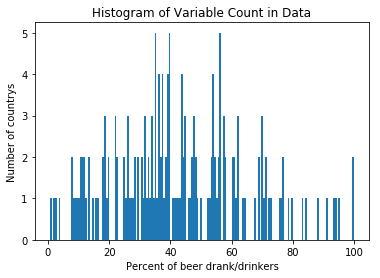

In [14]:
v = input("What variable would you like to see a histogram of?:\nOption inputs are in brackets:\nAverage Worldwide Beer Consumption (beer)\nAverage Worldwide Wine Consumption (wine)\nAverage Worldwide Spirits Consumption (spirits)\nAverage Male Alcohol Consumption(male_avg)\nAverage Female Alcohol Consumption(female_avg)\nAverage Alcohol Consumption(both_sexes_avg)\n")

plt.pyplot.hist(df[v],bins = 174)
plt.pyplot.xlabel("Percent of "+v+ " drank/drinkers")
plt.pyplot.ylabel("Number of countrys")
plt.pyplot.title("Histogram of Variable Count in Data")

Let's now look at the correlation between all of the different variables.

In [15]:
df.corr()

,beer,wine,spirits,both_sexes_avg,male_avg,female_avg
beer,1.000000,-0.190838,-0.416605,-0.174512,-0.183068,-0.179305
wine,-0.190838,1.000000,-0.306278,0.113027,0.145274,0.125461
spirits,-0.416605,-0.306278,1.000000,0.094443,0.083637,0.079228
both_sexes_avg,-0.174512,0.113027,0.094443,1.000000,0.985487,0.990471
male_avg,-0.183068,0.145274,0.083637,0.985487,1.000000,0.996803
female_avg,-0.179305,0.125461,0.079228,0.990471,0.996803,1.000000


There are only a few values that are important in this dataframe. What we are trying to do is create a bit of software that predicts how likely a person is to purchase a specific catagory of products. Thoes products catagories being, beer, wine and spirits.  

In order to do this it might be helpfull to look at a plot of the average percent of the worldwide population that consumes alcohol on a single plot.

Plot of the relationship between the average percent worldwide people that consume alcohol and the different types of alcohol that they consume by country
Blue: Beer
Orange: Wine
Green: Spirits


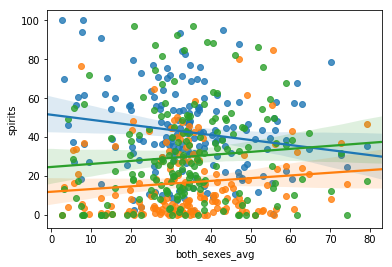

In [16]:
# Determine the linear relationships between each variable
sns.regplot(x="both_sexes_avg",y="beer", data=df)
sns.regplot(x="both_sexes_avg",y="wine", data=df)
sns.regplot(x="both_sexes_avg",y="spirits", data=df)
print('Plot of the relationship between the average percent worldwide people that consume alcohol and the different types of alcohol that they consume by country')
print('Blue: Beer')
print('Orange: Wine')
print('Green: Spirits')

Ok, maybe not. Maybe we should look at just the correlation between the worldwide poulation and levels of consumption of different beverages. 

In [17]:
df[["both_sexes_avg","beer","wine","spirits"]].corr()

,both_sexes_avg,beer,wine,spirits
both_sexes_avg,1.000000,-0.174512,0.113027,0.094443
beer,-0.174512,1.000000,-0.190838,-0.416605
wine,0.113027,-0.190838,1.000000,-0.306278
spirits,0.094443,-0.416605,-0.306278,1.000000


Gathering some generalized statistics on the data might also be useful.

In [18]:
df.describe()

,beer,wine,spirits,both_sexes_avg,male_avg,female_avg
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,42.668966,16.717816,29.995977,34.169540,43.952299,15.874138
std,21.788337,18.126418,24.075076,14.656145,18.232026,6.643130
min,0.600000,0.000000,0.000000,2.800000,3.000000,1.400000
25%,27.700000,2.450000,11.575000,26.325000,33.825000,12.325000
50%,39.800000,8.600000,25.500000,33.250000,44.150000,15.850000
75%,56.250000,28.075000,44.625000,41.500000,54.375000,19.450000
max,100.000000,84.700000,97.300000,79.100000,92.300000,34.900000


As it might be useful to work with the data in terms of country, a seperate dataframe is created indexed by country. 

In [19]:
df_group_test = df[['beer','wine','spirits','both_sexes_avg','male_avg','female_avg']]
grouped_test1 = df_group_test.groupby(df['country'],as_index=True).mean()
grouped_test1

,beer,wine,spirits,both_sexes_avg,male_avg,female_avg
country,,,,,,
Albania,34.3,26.5,37.6,31.7,41.7,15.0
Algeria,57.3,24.4,18.3,63.0,74.6,26.9
Andorra,34.1,42.0,23.9,32.7,45.6,15.9
Angola,70.3,17.6,11.3,29.0,37.5,14.2
Antigua and Barbuda,33.0,18.3,45.4,30.7,41.0,14.7
...,...,...,...,...,...,...
United Republic of Tanzania,12.2,0.4,1.6,32.1,40.9,14.8
United States of America,47.0,18.1,34.9,49.3,62.9,22.4
Uruguay,35.2,43.7,21.1,20.3,23.8,9.0


Let's do some more sttistical analysis by gathering the P-value and the Pearson Correlation Coefficent to determine the statistical significance of each drink type to the population.

Remember that the closer the Person Coerlation coefficent is to 1 and the lower the P-value the stronger the statistical significance of the variable is in predicting our desired output.

P-value is the probability value that the correlation between these two variables is statistically significant
- If p-value is <0.001: we say there is strong evidence that the correlation is significant.
- The p-value is <0.05: there is moderate evidence that the correlation is significant.
- The p-value is <0.1: there is weak evidence that the correlation is significant.
- The p-value is >0.1: there is no evidence that the correlation is significant.

In [ ]:
pearson_coef , p_value = stats.pearsonr(df['both_sexes_avg'],df['beer'])
print("For the correlation of both Males and Females to Beer:")
print("The Pearson Correation Coefficient of is", pearson_coef , "with a P-value of P=", p_value ,"\n")

pearson_coef , p_value = stats.pearsonr(df['both_sexes_avg'],df['wine'])
print("For the correlation of both Males and Females to Wine:")
print("The Pearson Correation Coefficient of is", pearson_coef , "with a P-value of P=", p_value ,"\n")

pearson_coef , p_value = stats.pearsonr(df['both_sexes_avg'],df['spirits'])
print("For the correlation of both Males and Females to Spirits:")
print("The Pearson Correation Coefficient of is", pearson_coef , "with a P-value of P=", p_value)

Let's now analize the data by country. Starting by determining the countrys that drink the most and the least

In [21]:
print('Country of minimal consumption:\n',df.min(),'\n')
print('Country of maximum consumption:\n',df.max())

Country of minimal consumption:
 country           Albania
beer                  0.6
wine                    0
spirits                 0
both_sexes_avg        2.8
male_avg                3
female_avg            1.4
dtype: object 

Country of maximum consumption:
 country           Vanuatu
beer                  100
wine                 84.7
spirits              97.3
both_sexes_avg       79.1
male_avg             92.3
female_avg           34.9
dtype: object


Visual analysis of the data grouped by country may lead to some insights. This can be done in several ways.

A vertical bar graph containing all of the data can be constructed.

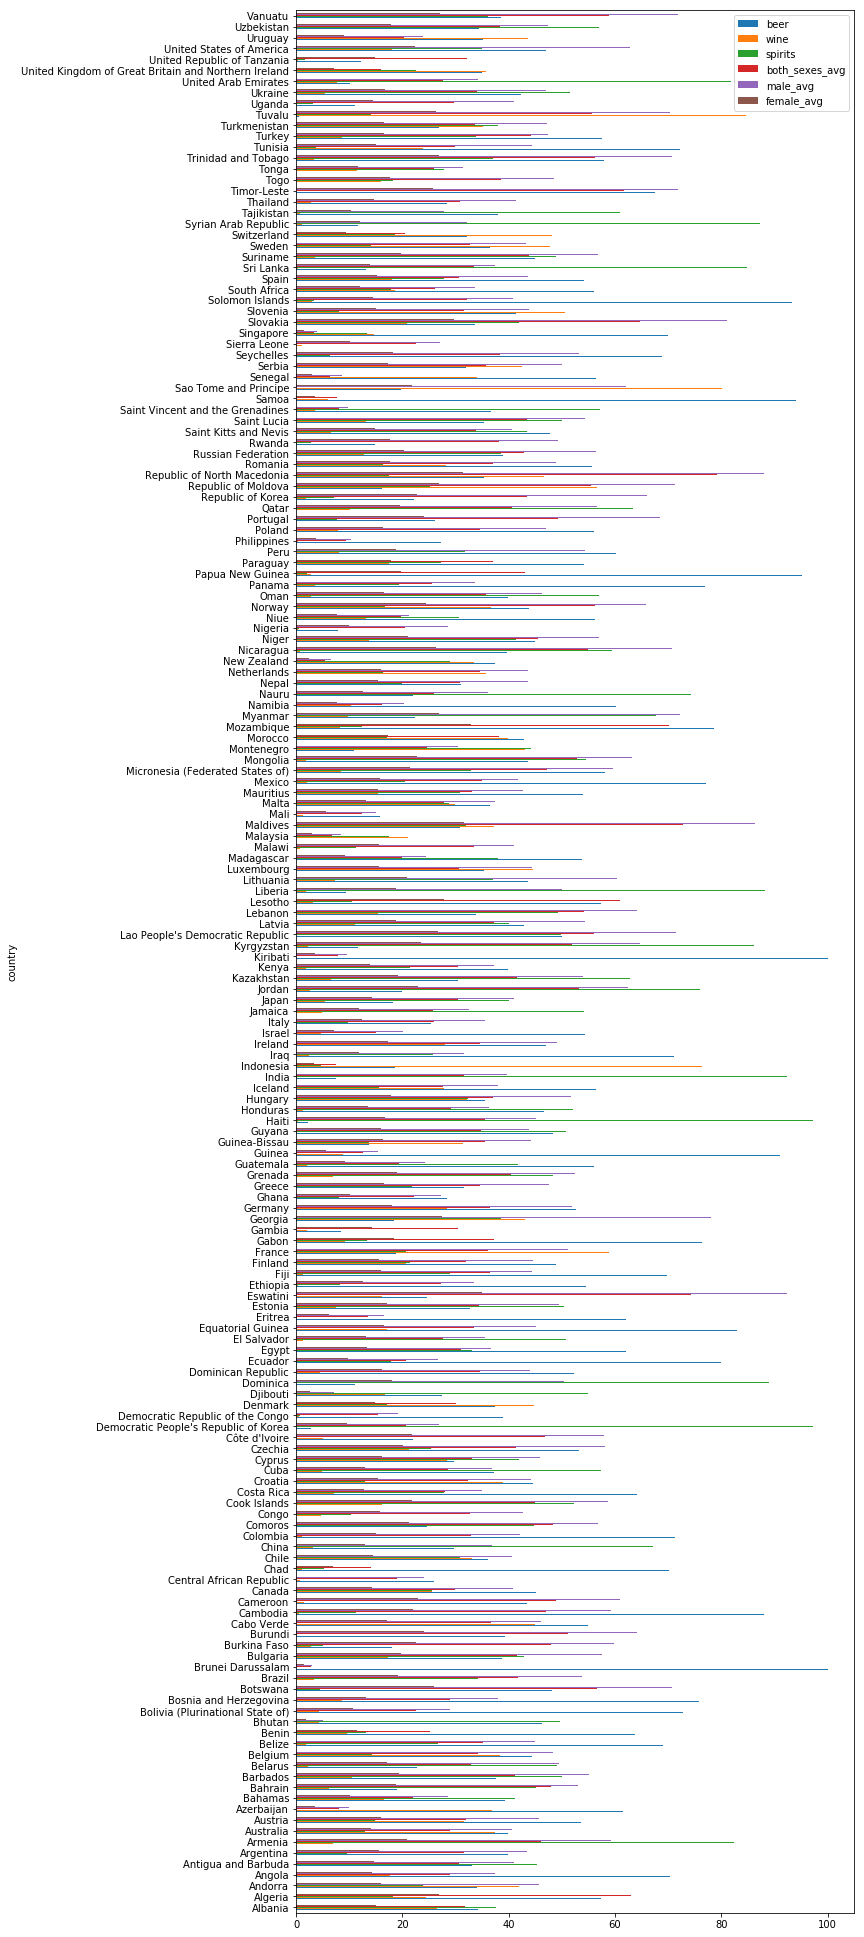

In [22]:
width = 10
height = 35
grouped_test1.plot.barh(figsize=(width, height))

Horizontal country indexed graphs organized by sex and drink type my also be useful.

Text(0.5,1,'Average Population Percentage that Consumes Alcohol by Country and Type of Alcohol')

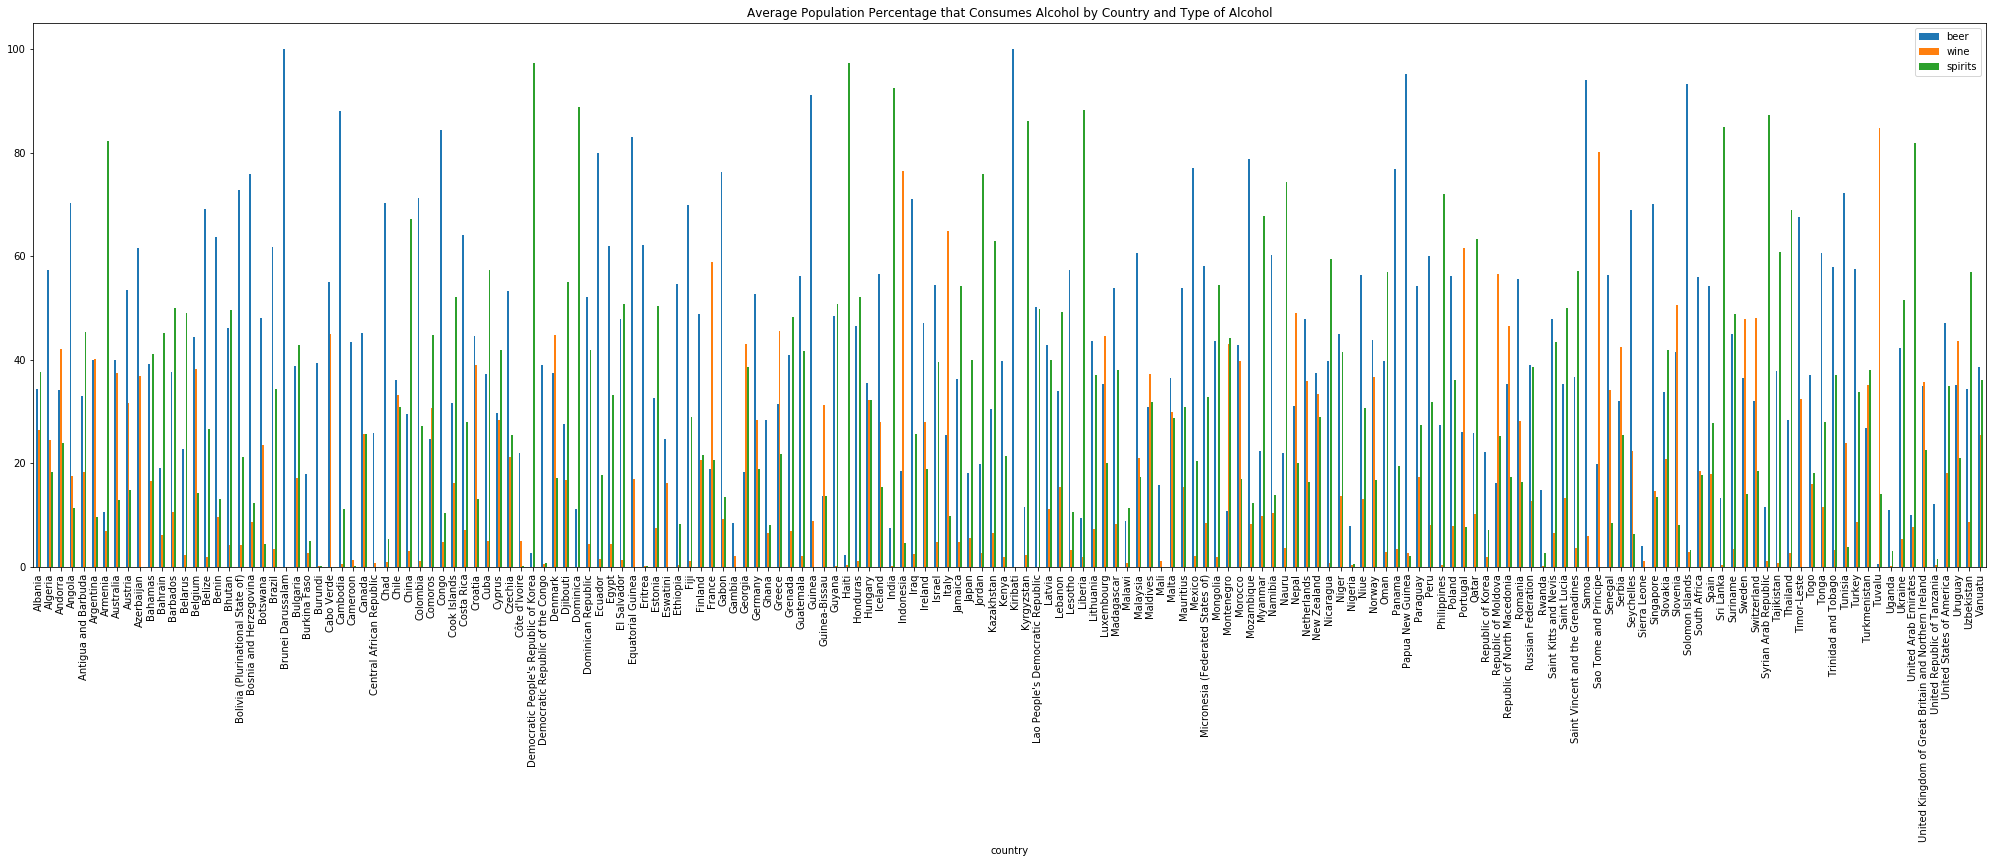

In [23]:
height1 = 10
width1 = 35
df_group_test = df[['beer','wine','spirits']]
grouped_test2 = df_group_test.groupby(df['country'],as_index=True).mean()
grouped_test2
ay1 = grouped_test2.plot.bar(figsize=(width1, height1))
ay1.set_title('Average Population Percentage that Consumes Alcohol by Country and Type of Alcohol')

Text(0.5,1,'Average Population Percentage that Consumes Alcohol by Country and Sex')

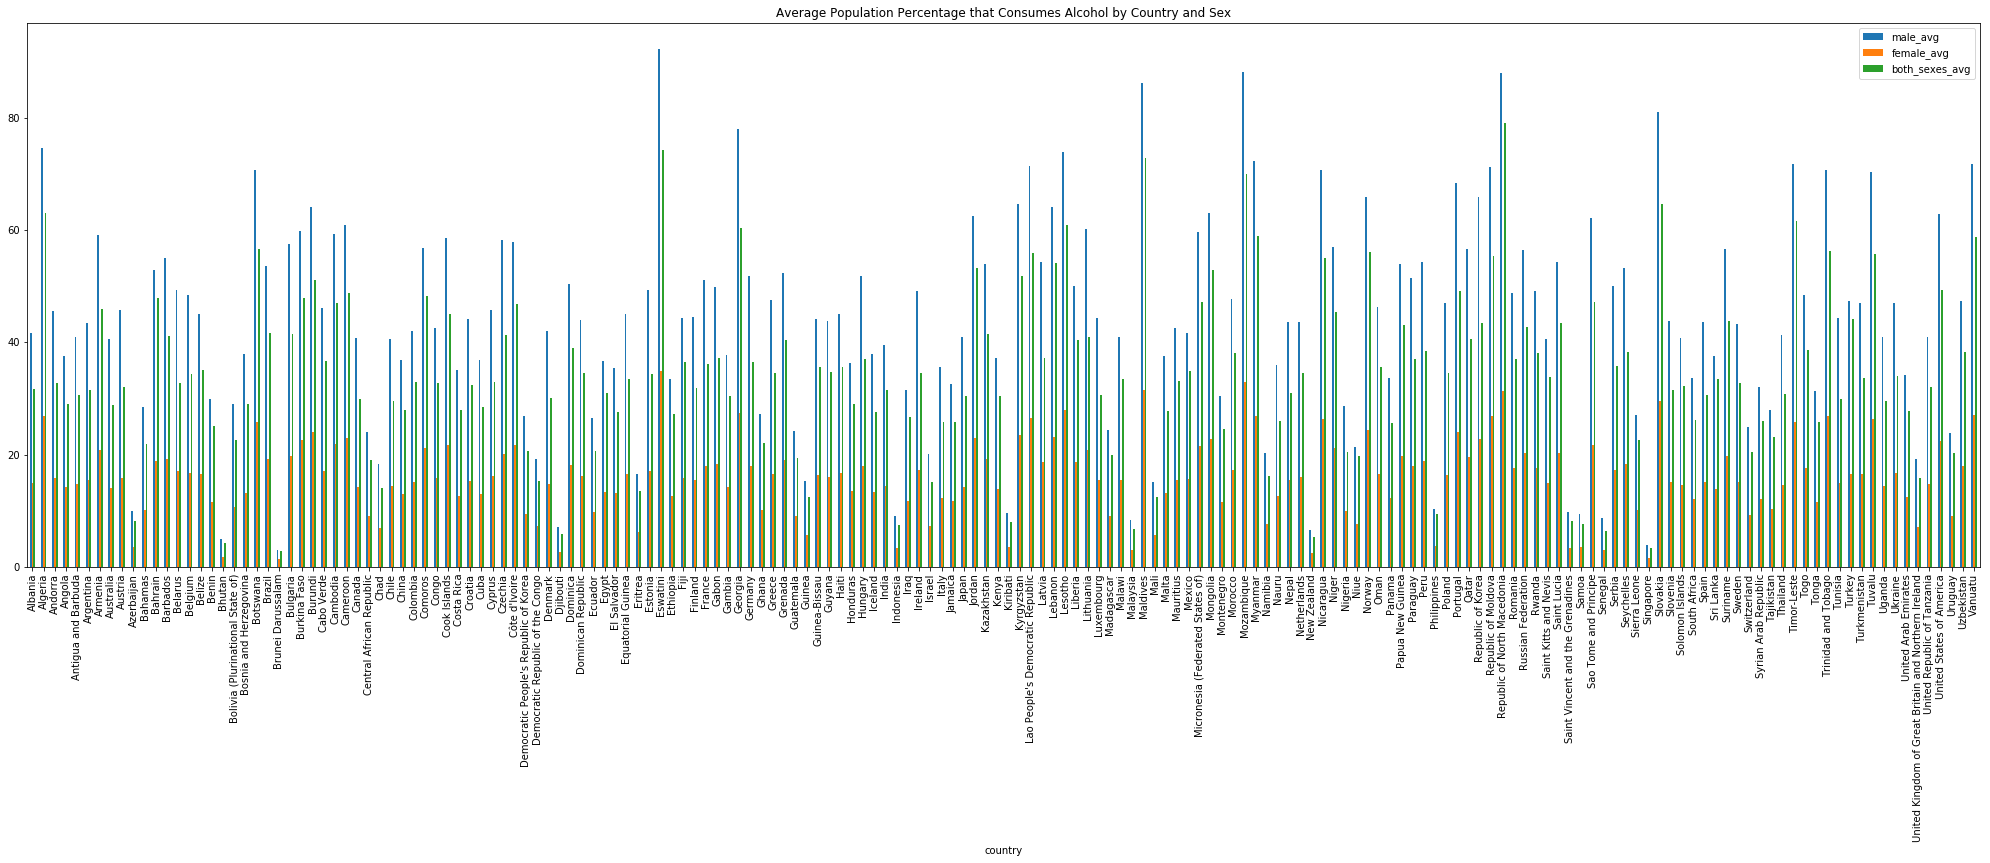

In [24]:
df_group_test = df[['male_avg','female_avg','both_sexes_avg']]
grouped_test3 = df_group_test.groupby(df['country'],as_index=True).mean()
grouped_test3
ay2 = grouped_test3.plot.bar(figsize=(width1, height1))
ay2.set_title('Average Population Percentage that Consumes Alcohol by Country and Sex')

Now that we have our data cleaned and analized by our eyes, why not let the computer take a crack at it by using a statistical modeling tecnique knon as a multiple linear regression to try and predict a equation for what percent of the population will be consuming alcohol.

In [25]:
lm = LinearRegression()
D = df[['beer','wine','spirits']]
# Fit model to variables in D
lm.fit(df[['male_avg' , 'female_avg']],df['both_sexes_avg'])
lm.fit(D,df['both_sexes_avg'])
print("Intercept:",lm.intercept_,"\nCoefficents:",lm.coef_)
print("Percent population of drinkers = ",lm.intercept_, "+(",lm.coef_[0],"x Beer) + (",lm.coef_[1], "x Wine) + (", lm.coef_[2], "x Spirits)")

Intercept: 34.58661330371284 
Coefficents: [-0.08028584  0.09274607  0.04861082]
Percent population of drinkers =  34.58661330371284 +( -0.08028584337950641 x Beer) + ( 0.0927460695639521 x Wine) + ( 0.048610821180272226 x Spirits)


With a model now developed we can use this model to plot the consumption rates of different catagories of alcohol.

In [34]:
import matplotlib.pyplot as plt
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15,55,100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable,'.',x_new,y_new,'-')
    plt.title('Polynomal Fit with Matplotlib for Consumption Rates ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898,0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Consumption Rate of'+Name)
    
    plt.show()
    plt.close()

In [37]:
# Get the variables 
x1 = df['beer']
x2 = df['wine']
x3 = df['spirits']
y = df['both_sexes_avg']

# Use a polynomial of the 3rd order
f1 = np.polyfit(x1,y,3)
f2 = np.polyfit(x2,y,3)
f3 = np.polyfit(x3,y,3)

p1 = np.poly1d(f1)
p2 = np.poly1d(f2)
p3 = np.poly1d(f3
              )
print("With X=Beer:\nBoth=",p1)
print("With X=Wine:\nBoth=",p2)
print("With X=Spirits:\n\nBoth=",p3)

With X=Beer:
Both=            3            2
1.821e-05 x - 0.004617 x + 0.3109 x + 30.02
With X=Wine:
Both=            3            2
1.821e-05 x - 0.004617 x + 0.3109 x + 30.02
With X=Spirits:

Both=            3            2
1.821e-05 x - 0.004617 x + 0.3109 x + 30.02


In [52]:
PlotPolly(p1,x1,y,'Beer vs Both Sexes')

AttributeError: module 'matplotlib' has no attribute 'plot'

In [33]:
PlotPolly(p2,x2,y,'Wine vs Both Sexes')

NameError: name 'p6' is not defined

In [ ]:
PlotPolly(p3,x3,y,'Spirits vs Both Sexes')

We can perform a polynomial transformation on the different catagories in ordter to try and predict values for a given country based on index.

In [54]:
pr1 = PolynomialFeatures(degree=3)
D_pr = pr1.fit_transform(D)
# Create a list of tuples with name of the model or estimator and corresponding constructor
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
# Pass list as argument to pipeline constructor
pipe = Pipeline(Input)
# Normalize data, perform a transform, fit the model simultaneously
pipe.fit(D,y)
ypipe1=pipe.predict(D)
ypipe1[0:4]

array([38.18204612, 32.24941786, 36.87626707, 29.31787403])

In order to predict results more acurately we must make a model that used the data given and trains off of it in order to predict the results.

We start by splitting our data into training and testing sets with the y value containing the values we are trying to predict and the x values being the data without the coulmn we are trying to predicat, in this case the total population of drinkers based on country and drink type. 

In [55]:
# Split data into training and test data

# Dummy frame
y_data =df['both_sexes_avg']
# Drop price in x data
x_data = df.drop('both_sexes_avg',axis=1)

Data is randomly split into training and testing data

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1) # test size is percent of data to be used for testing

print("number of test samples :", x_test.shape[0])
print("number of training samples :",x_train.shape[0])

numberof test samples : 27
number of training samples : 147


A multi linear regrgession object is created and a model is trained using using features in x_train[['','']]

In [57]:
lr = LinearRegression()
lr.fit(x_train[['beer','wine','spirits','male_avg','female_avg']], y_train)
# Predictions using training data:
yhat_train = lr.predict(x_train[['beer','wine','spirits','male_avg','female_avg']])
# Predictions using test data:
yhat_test = lr.predict(x_test[['beer','wine','spirits','male_avg','female_avg']])

We can now obtain a prediction from the training and testing models. 

In [58]:
yhat_train[0:5]

array([30.47402491, 25.08874932, 31.56630858, 20.11874634, 31.40631071])

In [59]:
yhat_test[0:5]

array([41.05461516,  5.32544146, 27.76860995, 12.268141  , 36.00388748])

Now to plot our results!

In [60]:
# Plotting Functions
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width,height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label = RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label = BlueName)
    
    plt.title(Title)
    plt.xlabel('Percent of Pop. that will Consume Product')
    plt.ylabel('Prorportion of Countrys')
    
    plt.show()
    plt.close()
    
def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
    width =12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    # training data
    # testing data
    # lr: linear regression object
    # poly_transform: polynomial transformation object
    
    xmax = max([xtrain.values.max(), xtest.values.max()])
    
    xmin = min([xtrain.values.min(), xtest.values.min()])
    
    x = np.arange(xmin, xmax, 0.1)
    
    plt.plot(xtrain, y_train, 'ro', label = 'Training Data')
    plt.plot(xtest, y_test, 'go', label = 'Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1,1))), label='Predicted Function')
    plt.ylim([-10000,60000])
    plt.ylabel('Percent of Pop. that will Consume Product')
    plt.legend()

In [61]:
Title= 'Distribution of Predicted Values Using Training Data vs Training Data Distirbution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)","Predicted Values (Train)", Title)

TypeError: 'module' object is not callable

In [62]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

TypeError: 'module' object is not callable

A polynomial regression may be more a more accurate model 

In [63]:
#training on 55% of the data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

# Perform a 5th degree polynomial transformation on the feature 'beer'
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['beer']])
x_test_pr = pr.fit_transform(x_test[['beer']])

# Create a linear regresion model named "poly" and train it
poly =LinearRegression()
poly.fit(x_train_pr, y_train)

# Assign the predicted values to yhat
yhat= poly.predict(x_test_pr)

# Compare first 5 values and compare them to actual targets
print("Predicted Values:", yhat[0:4])
print("True Values:", y_test[0:4].values)
print("Accuracy", yhat[0:4]/y_test[0:4].values)

# Plot training data, test data and predicted function
PollyPlot(x_train[['beer']], x_test[['beer']], y_train, y_test, poly, pr)
plt.ylim(0,100)

Predicted Values: [33.06689168 34.53051958 35.38737215 37.48530793]
True Values: [13.5 26.2 60.4 34.4]
Accuracy [2.44939938 1.31795876 0.58588364 1.08968918]


TypeError: 'module' object is not callable

The R^2 values of the test can be printed.

In [64]:
# R^2 of the training data
score_train= poly.score(x_train_pr, y_train)
# R^2 of the test data
score_test= poly.score(x_test_pr, y_test)

print('The R^2 of the training data is:',score_train)
print('The R^2 of the testing data is:', score_test)
# NOTE: negative value indicates overfitting

The R^2 of the training data is: 0.1434852449500552
The R^2 of the testing data is: -0.06629589631018384


A R^2 test can be performed in order to determine the best order of polynomial to use

In [65]:
Rsqu_test = []

order = [1, 2, 3, 4, 5, 6]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['beer']])
    
    x_test_pr = pr.fit_transform(x_test[['beer']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data for Beer')

AttributeError: module 'matplotlib' has no attribute 'plot'

In [ ]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['wine']])
    
    x_test_pr = pr.fit_transform(x_test[['wine']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data for Wine')

In [66]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['spirits']])
    
    x_test_pr = pr.fit_transform(x_test[['spirits']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data for Spirits')

AttributeError: module 'matplotlib' has no attribute 'plot'

A interactive model for changing test data amounts as well as the order of polynomial used is a helpful tool in data analysis.

In [67]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['beer']])
    x_test_pr = pr.fit_transform(x_test[['beer']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['beer']], x_test[['beer']], y_train,y_test, poly, pr)
    plt.ylim(0,100)

In [68]:
interact(f, order=(0, 100, 1), test_data=(0.05,0.95,0.05))

interactive(children=(IntSlider(value=50, description='order'), FloatSlider(value=0.45, description='test_data…

<function __main__.f(order, test_data)>

This is all helpful for understanding the data and how it relates to individual variables. A over all visual analysis of the interaction between the training data, the test data and the actual values for all variables is given below.

In [69]:
# Make polynomial object with multiple features
pr1=PolynomialFeatures(degree=2)
# Transform training and testing samples for features
x_train_pr1=pr.fit_transform(x_train[['beer','wine','spirits','male_avg','female_avg']])
x_test_pr1=pr.fit_transform(x_test[['beer','wine','spirits','male_avg','female_avg']])
# Create linear regression model and train object
poly1=linear_model.LinearRegression().fit(x_train_pr1,y_train)
# Predict output of polynomail features, display predicted data vs test data
yhat_test1=poly1.predict(x_test_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

TypeError: 'module' object is not callable

To really hone down the predicted values a Ridge regression can be used.

In [70]:
# Create Ridge regression object setting regularization parameter to 0.1
RigeModel = Ridge(alpha = 0.1)
# Fit model
RigeModel.fit(x_train_pr,y_train)
# Obtain a prediction
yhat = RigeModel.predict(x_test_pr)
# Compare the first five predicted samples to test set
print("Predicted:", yhat[0:4])
print('Test Set :', y_test[0:4].values)m

Predicted: [27.49289122 34.19840545 34.98240825 36.54332922]
Test Set : [13.5 26.2 60.4 34.4]


C:\Users\user\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.735161e-18
  overwrite_a=True).T


The value of alpha that mimimizes the test error is selected and plotted.

In [71]:
Rsqu_test = []
Rsqu_train = []
dummy1 = [] 
ALFA = 10*np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa)
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

width = 12
height = 10
plt.figure(figsize=(width,height))

plt.plot(ALFA,Rsqu_test, label='validation data ')
plt.plot(ALFA,Rsqu_train, 'r', label='training data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

TypeError: 'module' object is not callable

As the final step, a grid search is done to guess the optimal value of alph to use to optimize our predictions.

In [72]:
# Create a dictinary of parameter valeus
parameters1 = [{'alpha':[0.001,0.1,1,10,100,1000,10000,1000000]}]

# Create a ridge regions object
RR = Ridge()
# Create a ridge grid search object
Grid1 = GridSearchCV(RR,parameters1,cv=4)
# Fit the model
Grid1.fit(x_data[['beer','wine','spirits','male_avg','female_avg']], y_data)
# Find best parameter values
BestRR = Grid1.best_estimator_
# Test model on test data
BestRR.score(x_test[['beer','wine','spirits','male_avg','female_avg']], y_test)
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['beer','wine','spirits','male_avg','female_avg']],y_data)
Grid2.best_estimator_

C:\Users\user\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

And there we have it a program that talkes in csv files and outputs statistical predictions of the population of drinker in each country based on their sex and drink of choice!